In [34]:
import kagglehub
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [35]:
path = kagglehub.dataset_download("bobbyscience/league-of-legends-diamond-ranked-games-10-min")
csv_file_path = os.path.join(path, "high_diamond_ranked_10min.csv")
original_df = pd.read_csv(csv_file_path)

original_df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [36]:
clean_df = original_df.dropna().reset_index(drop=True)
target = clean_df["blueWins"]

clean_df.drop(columns=["gameId", "blueWins"], inplace=True)
clean_df

,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,28,2,1,9,6,11,0,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,12,1,0,5,5,5,0,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,15,0,0,7,11,4,1,1,0,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,43,1,0,4,5,5,1,0,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,75,4,0,6,6,6,0,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,17,2,1,7,4,5,1,1,0,0,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,54,0,0,6,4,8,1,1,0,0,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,23,1,0,6,7,5,0,0,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,14,4,1,2,3,3,1,1,0,0,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [37]:
clean_df.dtypes

,0
blueWardsPlaced,int64
blueWardsDestroyed,int64
blueFirstBlood,int64
blueKills,int64
blueDeaths,int64
blueAssists,int64
blueEliteMonsters,int64
blueDragons,int64
blueHeralds,int64
blueTowersDestroyed,int64


## Principal Component Analysis (PCA)

In [38]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clean_df)
scaled_data

array([[ 0.31699566, -0.37927514,  0.99042944, ..., -0.01334201,
        -0.9287406 ,  0.05229268],
       [-0.57099219, -0.83906887, -1.00966304, ...,  0.59334248,
         1.0337835 ,  0.75861871],
       [-0.40449447, -1.2988626 , -1.00966304, ...,  0.52043619,
        -0.65490002,  0.5339091 ],
       ...,
       [ 0.03949946, -0.83906887, -1.00966304, ...,  0.95995698,
         1.9922255 ,  1.22749041],
       [-0.45999371,  0.54031232,  0.99042944, ...,  0.54751567,
         1.35326417, -0.79892075],
       [-0.23799674, -1.2988626 ,  0.99042944, ...,  0.01269595,
        -0.74618022, -0.77141898]])

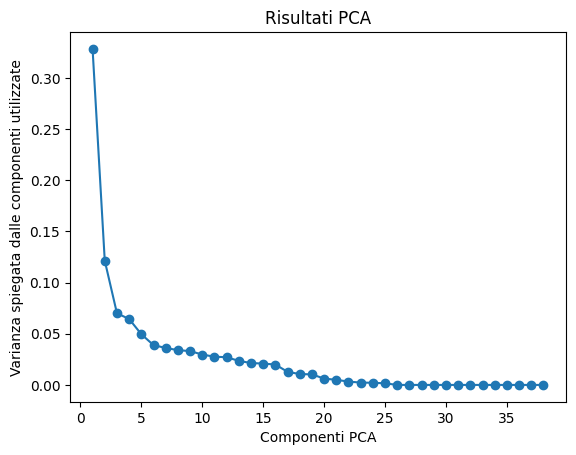

In [39]:
pca = PCA().fit(scaled_data)

# Grafico risultati della pca
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o')
plt.xlabel('Componenti PCA')
plt.ylabel('Varianza spiegata dalle componenti utilizzate')
plt.title("Risultati PCA")
plt.show()

In [ ]:
pca = PCA(n_components=10).fit(scaled_data)
pca_data = pca.transform(scaled_data)
pca_data

In [40]:
pca.explained_variance_ratio_

array([3.28366518e-01, 1.21405046e-01, 7.00094560e-02, 6.44289803e-02,
       4.95803483e-02, 3.88895742e-02, 3.61316410e-02, 3.39959528e-02,
       3.30642028e-02, 2.96901397e-02, 2.75576892e-02, 2.70943657e-02,
       2.34901437e-02, 2.14019266e-02, 2.08500395e-02, 1.99394386e-02,
       1.27683254e-02, 1.06284168e-02, 1.03036432e-02, 6.19979909e-03,
       4.97310610e-03, 3.25687136e-03, 2.28185017e-03, 2.12005197e-03,
       1.57247424e-03, 5.53497434e-17, 5.00631178e-17, 3.37874422e-17,
       3.04764840e-17, 2.01247171e-17, 1.63933246e-17, 5.37448550e-19,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

In [41]:
sum(pca.explained_variance_ratio_)

0.9999999999999998